# Approach and Assumptions

* As this is the first round of filtering the candidates for an interships, I mainly concentrated on reduing the number of candidates to be selected for next round
* Firstly I removed the columns having null values >50%. Because no analysis or conclusion can be drawn from a column which has >50% of values missing
* Calculated the average of each skill(Python,ML,DL,NLP) of the applied candidates
* Filtered the candidates having skills less than average among the applied candidates
* As the internship requires 3 months of availability, removed the candidates who wouldn't be available for complete 3 months
* Finally, the list of candidates reduced from 1136 to 200 for next round(filtered 82% of candidates)
########################################################################################################################
* Performed EDA analysis
* Did not build any ML model as there is no training data available
* Assuming the output would have either been 'selected' or 'not-selected'(1 or 0), building a classification ML model(Logistic Regression) would have served the purpose

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")


# Reading the given excel file

In [2]:
df = pd.read_excel("Applications_for_Machine_Learning_internship_edited.xlsx")
df

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,NaN,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,NaN,NaN,NaN,NaN
1132,NaN,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,NaN,NaN,NaN
1133,NaN,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,NaN,8.77/10,9.40/9.40,NaN
1134,NaN,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,NaN,7.90/10,90.00/90.00,NaN


In [3]:
#Checking for null values
100*df.isnull().mean()

Name                                                                                                 100.000000
Python (out of 3)                                                                                      0.000000
Machine Learning (out of 3)                                                                            0.000000
Natural Language Processing (NLP) (out of 3)                                                           0.000000
Deep Learning (out of 3)                                                                               0.000000
Other skills                                                                                           5.809859
Are you available for 3 months, starting immediately, for a full-time work from home internship?       0.000000
Degree                                                                                                 3.785211
Stream                                                                                                14

In [4]:
# selecting columns having null values > 50%
# Including the 'Name' column also as it is completely empty, this may not be the case in all scenarios
cols=['Name','Performance_PG','Performance_UG','Performance_12','Performance_10']

In [5]:
# dropping the columns having null values > 50%
df=df.drop(cols,axis=1)
df

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023
...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024


In [6]:
100*df.isnull().mean().sort_values(ascending = False)

Stream                                                                                               14.964789
Other skills                                                                                          5.809859
Degree                                                                                                3.785211
Python (out of 3)                                                                                     0.000000
Machine Learning (out of 3)                                                                           0.000000
Natural Language Processing (NLP) (out of 3)                                                          0.000000
Deep Learning (out of 3)                                                                              0.000000
Are you available for 3 months, starting immediately, for a full-time work from home internship?      0.000000
Current Year Of Graduation                                                                            0.000000
d

#### Since 'Stream', 'Other Skills' & 'Degree' colums are subjective to candidate, imputing with mode value(as they are categorical columns) may not help in our analysis  

In [7]:
df.nunique()

Python (out of 3)                                                                                       4
Machine Learning (out of 3)                                                                             4
Natural Language Processing (NLP) (out of 3)                                                            4
Deep Learning (out of 3)                                                                                4
Other skills                                                                                         1057
Are you available for 3 months, starting immediately, for a full-time work from home internship?       25
Degree                                                                                                 91
Stream                                                                                                186
Current Year Of Graduation                                                                             22
dtype: int64

In [8]:
#Checking the average of 'Python (out of 3)' column of the applied candidates
python_mean=round(np.mean(df['Python (out of 3)']),2)
python_mean

1.79

In [9]:
#Checking the average of 'Machine Learning (out of 3)' column of the applied candidates
ML_mean=round(np.mean(df['Machine Learning (out of 3)']),2)
ML_mean

1.3

In [10]:
#Checking the average of 'Natural Language Processing (NLP) (out of 3)' column of the applied candidates
NLP_mean=round(np.mean(df['Natural Language Processing (NLP) (out of 3)']),2)
NLP_mean

0.5

In [11]:
#Checking the average of 'Deep Learning (out of 3)' column of the applied candidates
DL_mean=round(np.mean(df['Deep Learning (out of 3)']),2)
DL_mean

0.66

In [12]:
# number of candidates having skills >=2 in ML
np.sum((df['Machine Learning (out of 3)']>=2))

590

In [13]:
# percentage of candidates having skills >=2 in ML
590/1136 *100

51.93661971830986

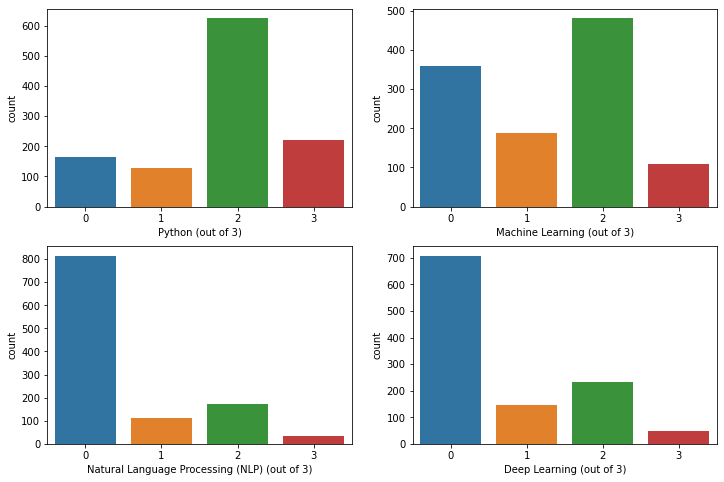

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(df['Python (out of 3)'])
plt.subplot(2,2,2)
sns.countplot(df['Machine Learning (out of 3)'])
plt.subplot(2,2,3)
sns.countplot(df['Natural Language Processing (NLP) (out of 3)'])
plt.subplot(2,2,4)
sns.countplot(df['Deep Learning (out of 3)'])
plt.show()

* Majority of the candidates have skills >=2 in Python
* Only around half of the Candidates(52%) have skills >=2 in Machine Learning
* Majority of the candidates have no skills in NLP & DL

In [15]:
#Filtering the rows/candidates who have skills below the average of all other applied cadidates
filtered_df=df[(df['Python (out of 3)']>python_mean)&(df['Machine Learning (out of 3)']>ML_mean)&(df['Natural Language Processing (NLP) (out of 3)']>NLP_mean)&(df['Deep Learning (out of 3)']>DL_mean)]
filtered_df.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation
15,2,2,1,2,"Database Management System (DBMS), English Pro...","Yes, I am available for 3 months starting imme...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2024
20,3,3,3,3,"Data Analytics, Deep Learning, Flask, Image Pr...","Yes, I am available for 3 months starting imme...",Post Graduate Diploma in Management (P.G.D.M.),Data Science And Business Analytics,2022
23,2,2,2,1,"C++ Programming, Chemistry, English Proficienc...","Yes, I am available for 3 months starting imme...",B.Tech (Hons.),Computer Science,2023
29,2,2,1,1,"Cloud Computing, Amazon Web Services (AWS), C ...","Yes, I am available for 3 months starting imme...",Master of Computer Applications (MCA),Networks And Communication,2023
34,3,2,2,2,"Data Science, Database Management System (DBMS...","Yes, I am available for 3 months starting imme...",Integrated M.Sc.,Data Science,2024


In [16]:
#Filtering the candidates who aren't available for complete 3 months
filtered_df=filtered_df[(filtered_df['Are you available for 3 months, starting immediately, for a full-time work from home internship? '] == 'Yes, I am available for 3 months starting immediately for a full-time internship.')]

In [17]:
filtered_df.shape

(200, 9)

In [18]:
filtered_df.nunique()

Python (out of 3)                                                                                      2
Machine Learning (out of 3)                                                                            2
Natural Language Processing (NLP) (out of 3)                                                           3
Deep Learning (out of 3)                                                                               3
Other skills                                                                                         200
Are you available for 3 months, starting immediately, for a full-time work from home internship?       1
Degree                                                                                                37
Stream                                                                                                53
Current Year Of Graduation                                                                            13
dtype: int64

In [19]:
# Saved the filtred candidates in an different excel sheet called "Filtered_Candidates.xlsx"
filtered_df.to_excel("Filtered_Candidates.xlsx")

# Conclusion & Recommendations

* Majority of the candidates have skills >=2 in Python
* Only around half of the Candidates(52%) have skills >=2 in Machine Learning
* Majority of the candidates have no skills in NLP & DL
* Candidates can be further filtered if there is any particular Degree/Stream is necessary
* Data on Percentage in UG,PG,10,12 is not collected in the right format. If collected, would have further helped in the analysis
* Dropdowns of fixed Degree/Stream has to be provided for proper collection of data
* The strength of 'Other Skills' can only be judged in techincal round or through any task
